In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\91788\Downloads\placement.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26,yes
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,yes
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


cgpa                       AxesSubplot(0.125,0.125;0.352273x0.755)
placement_exam_marks    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

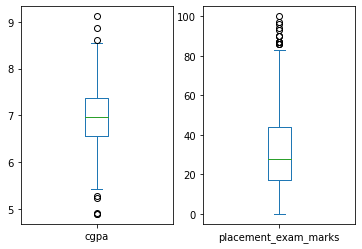

In [4]:
df.plot(kind="box",subplots=True)

C:\Users\91788\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

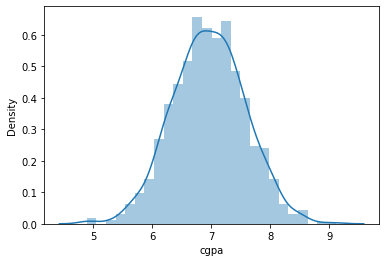

In [5]:
# cgpa and placement
sns.distplot(df["cgpa"])

C:\Users\91788\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

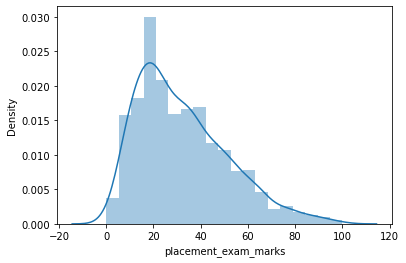

In [6]:
sns.distplot(df["placement_exam_marks"])

In [7]:
df["cgpa"].mean()

6.96124000000001

In [8]:
print(df["cgpa"].std())
print(df["cgpa"].min())
print(df["cgpa"].max())

0.6158978751323894
4.89
9.12


In [9]:
df.describe()

,cgpa,placement_exam_marks
count,1000.000000,1000.000000
mean,6.961240,32.225000
std,0.615898,19.130822
min,4.890000,0.000000
25%,6.550000,17.000000
50%,6.960000,28.000000
75%,7.370000,44.000000
max,9.120000,100.000000


In [10]:
upper_limit=df['cgpa'].mean()+ 3*df['cgpa'].std()
upper_limit

8.808933625397177

In [11]:
lower_limit=df['cgpa'].mean()- 3*df['cgpa'].std()
lower_limit

5.113546374602842

In [12]:
 df[df['cgpa']>8.8]

,cgpa,placement_exam_marks,placed
995,8.87,44,1
996,9.12,65,1


In [13]:
df[df['cgpa']<5.1]

,cgpa,placement_exam_marks,placed
485,4.92,44,1
997,4.89,34,0
999,4.90,10,1


In [14]:
 df[(df['cgpa']>8.8) | (df['cgpa']<5.1)]

,cgpa,placement_exam_marks,placed
485,4.92,44,1
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
999,4.90,10,1


In [15]:
# removing outlier
#triming or capping
new_df= df[(df['cgpa']<8.8) & (df['cgpa']>5.1)]
new_df


,cgpa,placement_exam_marks,placed
0,7.19,26,yes
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1
994,6.48,63,0


C:\Users\91788\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

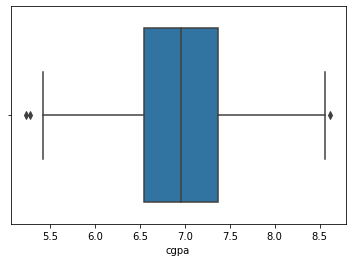

In [16]:
sns.boxplot(new_df["cgpa"])

In [22]:
#capping
new_df=df[(df["cgpa"]<upper_limit)&(df["cgpa"]>lower_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,yes
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


C:\Users\91788\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

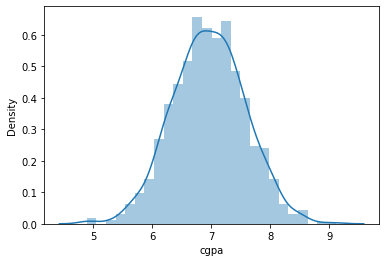

In [24]:
sns.distplot(df["cgpa"])

In [25]:
df['cgpa']=np.where(df['cgpa']>upper_limit,upper_limit,
                   np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [26]:
df['cgpa']

0      7.19
1      7.46
2      7.54
3      6.42
4      7.23
       ... 
995    8.87
996    9.12
997    4.89
998    8.62
999    4.90
Name: cgpa, Length: 1000, dtype: float64